In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 2   #for binary classification
epochs = 12
#input image dimensions
img_rows, img_cols = 28, 28

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
y_new_train=[]
for i in y_train:
    if i==0:
        y_new_train.append(0);
    else:
        y_new_train.append(1);
print(y_new_train[0:10])

y_new_test=[]
for i in y_test:
    if i==0:
        y_new_test.append(0);
    else:
        y_new_test.append(1);
print(y_new_test[0:10])

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 0, 1, 1, 1, 1, 1, 1]


In [5]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#print(x_train[0])
x_train.shape

(60000, 28, 28, 1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_test.shape, 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(10000, 28, 28, 1) test samples


In [7]:
# convert class vectors to binary class matrices
y_new_train_encoded = keras.utils.to_categorical(y_new_train, num_classes)
y_new_test_encoded = keras.utils.to_categorical(y_new_test, num_classes)
type(y_new_test)
len(y_new_train)
print(y_new_train[0])

1


In [9]:
seqmodel = Sequential()
seqmodel.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
seqmodel.add(Conv2D(64, (3, 3), activation='relu'))
seqmodel.add(MaxPooling2D(pool_size=(2, 2)))
seqmodel.add(Dropout(0.25))
seqmodel.add(Flatten())  #to dissolve the grid and put it in a linear structure i.e., same as deep neural network
seqmodel.add(Dense(128, activation='relu'))
seqmodel.add(Dropout(0.5))
seqmodel.add(Dense(num_classes, activation='softmax'))

In [10]:
from keras import layers, models     #conversion to functional model

input_layer = layers.Input(batch_shape=seqmodel.layers[0].input_shape)
prev_layer = input_layer
for layer in seqmodel.layers:
    prev_layer = layer(prev_layer)

funcmodel = models.Model([input_layer], [prev_layer])

In [11]:
funcmodel.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [12]:
funcmodel.fit(x_train, y_new_train_encoded,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,validation_data=(x_test, y_new_test_encoded))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 302s 5ms/step - loss: 0.0394 - acc: 0.9863 - val_loss: 0.0130 - val_acc: 0.9951
Epoch 2/12
60000/60000 [==============================] - 331s 6ms/step - loss: 0.0123 - acc: 0.9962 - val_loss: 0.0105 - val_acc: 0.9966
Epoch 3/12
60000/60000 [==============================] - 301s 5ms/step - loss: 0.0079 - acc: 0.9976 - val_loss: 0.0076 - val_acc: 0.9976
Epoch 4/12
60000/60000 [==============================] - 362s 6ms/step - loss: 0.0066 - acc: 0.9977 - val_loss: 0.0050 - val_acc: 0.9984
Epoch 5/12
60000/60000 [==============================] - 325s 5ms/step - loss: 0.0054 - acc: 0.9984 - val_loss: 0.0063 - val_acc: 0.9980
Epoch 6/12
60000/60000 [==============================] - 296s 5ms/step - loss: 0.0046 - acc: 0.9985 - val_loss: 0.0052 - val_acc: 0.9984
Epoch 7/12
60000/60000 [==============================] - 302s 5ms/step - loss: 0.0041 - acc: 0.9985 - val_loss: 0.0053 - 

RuntimeError: You must compile a model before training/testing. Use `model.compile(optimizer, loss)`.

In [13]:
score = funcmodel.evaluate(x_test, y_new_test_encoded, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.004922847816186686
Test accuracy: 0.9986


In [17]:
# try predict
predictions=model.predict_classes(x_test)
predicted=np.array(predictions.tolist())

Confusion matrix, without normalization
[[ 112  868]
 [ 279 8741]]
Normalized confusion matrix
[[0.11 0.89]
 [0.03 0.97]]


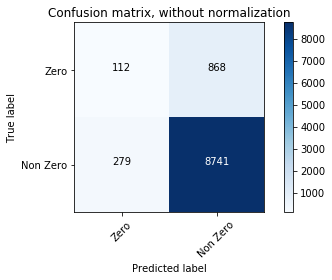

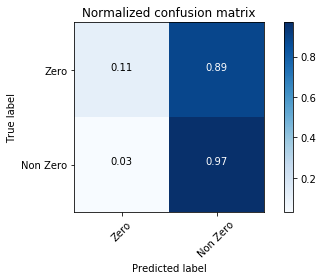

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

classes=2;
class_names=['Zero','Non Zero'];
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_new_test, predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
